#### <span style="color:Aquamarine ">**Import the libraries**</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

#### <span style="color:Aquamarine ">**Preprocessing Data**</span>

In [2]:
df = pd.read_csv("F:\Internships\Labmentix\Zomato EDA Project\zomato_restaurants_in_India.csv")
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [3]:
df.nunique()

res_id                  55568
name                    41100
establishment              27
url                     55568
address                 50657
city                       99
city_id                    83
locality                 3731
latitude                53356
longitude               53318
zipcode                  1304
country_id                  1
locality_verbose         3910
cuisines                 9382
timings                  7740
average_cost_for_two      145
price_range                 4
currency                    1
highlights              31455
aggregate_rating           33
rating_text                39
votes                    2644
photo_count              2514
opentable_support           1
delivery                    3
takeaway                    1
dtype: int64

In [4]:
df.city.unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [5]:
df[df['city']=='Pune']

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
164447,11283,Harajuku - The O Hotel,['Fine Dining'],https://www.zomato.com/pune/harajuku-the-o-hot...,"The O Hotel, North Main Road, Koregaon Park, Pune",Pune,5,"The O Hotel, Koregaon Park",18.540239,73.887518,...,4,Rs.,"['Cash', 'Debit Card', 'Lunch', 'Credit Card',...",3.7,Good,96,38,0.0,-1,-1
164448,10663,Mix@36 - The Westin,['Lounge'],https://www.zomato.com/pune/mix@36-the-westin-...,"The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...",Pune,5,"The Westin, Mundhwa",18.540040,73.905910,...,4,Rs.,"['Cash', 'Debit Card', 'Serves Alcohol', 'Take...",4.0,Very Good,682,78,0.0,-1,-1
164449,10743,Kangan - The Westin,['Fine Dining'],https://www.zomato.com/pune/kangan-the-westin-...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539455,73.906040,...,4,Rs.,"['Serves Alcohol', 'Cash', 'Debit Card', 'Take...",4.0,Very Good,310,285,0.0,-1,-1
164450,18938162,Palette - The Westin,['Fine Dining'],https://www.zomato.com/pune/palette-the-westin...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539430,73.906009,...,4,Rs.,"['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...",3.3,Average,9,31,0.0,-1,-1
164451,18310167,Coriander Kitchen - Conrad Pune,['Fine Dining'],https://www.zomato.com/pune/coriander-kitchen-...,"Conrad, Mangaldas Road, Bund Garden Road, Pune",Pune,5,"Conrad Pune, Bund Garden Road",18.535409,73.883592,...,4,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.4,Very Good,500,1116,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168659,13061,Lonavla Restaurant & Bar- Hotel Lonavla,['Casual Dining'],https://www.zomato.com/pune/lonavla-restaurant...,"Gawlinaka, Mumbai-Pune Highway, Lonavala, Pune",Pune,5,Lonavala,18.754747,73.405682,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.3,Very Good,474,81,0.0,-1,-1
168660,18555341,Utopia,['Casual Dining'],https://www.zomato.com/pune/utopia-lonavala?ut...,"CTS 159, Old Mumbai-Pune Road, Lonavala, Pune",Pune,5,Lonavala,18.754342,73.402737,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,336,204,0.0,-1,-1
168661,18767059,Mapro Garden,['Casual Dining'],https://www.zomato.com/pune/mapro-garden-lonav...,"3 & 4, Old Mumbai - Pune Highway, Valvan, Lona...",Pune,5,Lonavala,18.760234,73.419775,...,2,Rs.,"['Dinner', 'Takeaway Available', 'No Alcohol A...",4.3,Very Good,143,227,0.0,-1,-1
168662,6503906,Hotel Chandralok,['Casual Dining'],https://www.zomato.com/pune/hotel-chandralok-l...,"Near Bus Stand & Post Office, Opposite Mumbai-...",Pune,5,Lonavala,18.753223,73.405655,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.3,Very Good,317,86,0.0,-1,-1


In [6]:
df.shape

(211944, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [8]:
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
res_id,211944.0,1.349411e+07,7.883722e+06,50.0,3.301027e+06,1.869573e+07,1.881297e+07,1.915979e+07
city_id,211944.0,4.746785e+03,5.568766e+03,1.0,1.100000e+01,3.400000e+01,1.130600e+04,1.135400e+04
latitude,211944.0,2.149976e+01,2.278133e+01,0.0,1.549607e+01,2.251449e+01,2.684167e+01,1.000000e+04
longitude,211944.0,7.761528e+01,7.500104e+00,0.0,7.487796e+01,7.742597e+01,8.021932e+01,9.183277e+01
country_id,211944.0,1.000000e+00,0.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
average_cost_for_two,211944.0,5.958122e+02,6.062394e+02,0.0,2.500000e+02,4.000000e+02,7.000000e+02,3.000000e+04
price_range,211944.0,1.882535e+00,8.929891e-01,1.0,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
aggregate_rating,211944.0,3.395937e+00,1.283642e+00,0.0,3.300000e+00,3.800000e+00,4.100000e+00,4.900000e+00
votes,211944.0,3.780019e+02,9.253334e+02,-18.0,1.600000e+01,1.000000e+02,3.620000e+02,4.253900e+04
photo_count,211944.0,2.569712e+02,8.676689e+02,0.0,3.000000e+00,1.800000e+01,1.280000e+02,1.770200e+04


In [10]:
df[df['average_cost_for_two']==15000]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
77501,18392031,Gol Bungalow - Taj Falaknuma Palace,['Fine Dining'],https://www.zomato.com/hyderabad/gol-bungalow-...,"Taj Falaknuma Palace, Falaknuma, Hyderabad",Hyderabad,6,"Taj Falaknuma, Falaknuma",17.334338,78.467603,...,4,Rs.,"['Cash', 'Dinner', 'Credit Card', 'No Alcohol ...",3.9,Good,38,20,0.0,-1,-1
197677,18565535,Bhairo,['Fine Dining'],https://www.zomato.com/udaipur/bhairo-pichola?...,"Taj Lake Palace, Pichola, Udaipur",Udaipur,11054,"Taj Lake Palace, Pichola",24.575565,73.679718,...,4,Rs.,"['Cash', 'Debit Card', 'Dinner', 'Credit Card'...",2.9,Average,6,3,0.0,-1,-1
198049,18565535,Bhairo,['Fine Dining'],https://www.zomato.com/udaipur/bhairo-pichola?...,"Taj Lake Palace, Pichola, Udaipur",Udaipur,11054,"Taj Lake Palace, Pichola",24.575565,73.679718,...,4,Rs.,"['Cash', 'Debit Card', 'Dinner', 'Credit Card'...",2.9,Average,6,3,0.0,-1,-1
198655,18565535,Bhairo,['Fine Dining'],https://www.zomato.com/udaipur/bhairo-pichola?...,"Taj Lake Palace, Pichola, Udaipur",Udaipur,11054,"Taj Lake Palace, Pichola",24.575565,73.679718,...,4,Rs.,"['Cash', 'Debit Card', 'Dinner', 'Credit Card'...",2.9,Average,6,3,0.0,-1,-1


In [11]:
# Handling duplicates

df.shape

(211944, 26)

In [12]:
df.drop_duplicates(['res_id'], keep='first', inplace=True)
df.shape

(55568, 26)

In [13]:
# Handling missing values

df.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

#### Selecting only the essential features for our analysis

In [14]:
df['establishment'].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [15]:
print(df['establishment'].unique()[0])
print(type(df['establishment'].unique()[0]))

['Quick Bites']
<class 'str'>


In [16]:
# Removing [' '] from each value in establishment

df['establishment']=df['establishment'].apply(lambda x: x[2:-2])
print(df['establishment'].unique()[0])

Quick Bites


In [17]:
# changing '' to 'NA'
df['establishment'].apply(lambda x: np.where (x=="", "NA", x))
print(df['establishment'].unique())

['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


In [18]:
len(df['city'].unique())

99

In [19]:
df['city'].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [20]:
len(df[df['city']=='Pune'])

1843

In [21]:
df[df['city']=='Pune'].head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
164447,11283,Harajuku - The O Hotel,Fine Dining,https://www.zomato.com/pune/harajuku-the-o-hot...,"The O Hotel, North Main Road, Koregaon Park, Pune",Pune,5,"The O Hotel, Koregaon Park",18.540239,73.887518,...,4,Rs.,"['Cash', 'Debit Card', 'Lunch', 'Credit Card',...",3.7,Good,96,38,0.0,-1,-1
164448,10663,Mix@36 - The Westin,Lounge,https://www.zomato.com/pune/mix@36-the-westin-...,"The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...",Pune,5,"The Westin, Mundhwa",18.540040,73.905910,...,4,Rs.,"['Cash', 'Debit Card', 'Serves Alcohol', 'Take...",4.0,Very Good,682,78,0.0,-1,-1
164449,10743,Kangan - The Westin,Fine Dining,https://www.zomato.com/pune/kangan-the-westin-...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539455,73.906040,...,4,Rs.,"['Serves Alcohol', 'Cash', 'Debit Card', 'Take...",4.0,Very Good,310,285,0.0,-1,-1
164450,18938162,Palette - The Westin,Fine Dining,https://www.zomato.com/pune/palette-the-westin...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539430,73.906009,...,4,Rs.,"['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...",3.3,Average,9,31,0.0,-1,-1
164451,18310167,Coriander Kitchen - Conrad Pune,Fine Dining,https://www.zomato.com/pune/coriander-kitchen-...,"Conrad, Mangaldas Road, Bund Garden Road, Pune",Pune,5,"Conrad Pune, Bund Garden Road",18.535409,73.883592,...,4,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.4,Very Good,500,1116,0.0,-1,-1


In [22]:
df['locality'].nunique()

3731

In [23]:
df['country_id'].nunique()

1

In [24]:
df['locality_verbose'].nunique()

3910

In [25]:
print(df['cuisines'].nunique())
print(df['cuisines'].unique())

9382
['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']


In [26]:
df['cuisines'] = df['cuisines'].fillna('No cuisine')

In [27]:
df.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                    0
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

In [28]:
cuisines = []
df['cuisines'].apply(lambda x: cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines : ", cuisines.nunique())

Total number of unique cuisines :  134


In [29]:
print(df['timings'].nunique())
print(df['timings'].unique())

7740
['8:30am – 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ... '8am – 2:30pm, 5pm – 10pm (Mon-Sun)'
 '8am – 3pm, 6:30pm – 11pm (Mon-Sun)'
 '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)']


In [30]:
df['average_cost_for_two'].nunique()

145

In [31]:
df['price_range'].unique()

array([2, 1, 3, 4], dtype=int64)

In [32]:
df['currency'].unique()

array(['Rs.'], dtype=object)

In [33]:
print(df['highlights'].nunique())
print(df['highlights'].unique())

31228
["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"]


In [34]:
h1 = []
df['highlights'].apply(lambda x: h1.extend(x[2:-2].split("', '")))
h1 = pd.Series(h1)
print("Total number of unique highlights : ", h1.nunique())

Total number of unique highlights :  104


In [35]:
df[['aggregate_rating', 'votes', 'photo_count']].describe().loc[['mean', 'min', 'max']]

,aggregate_rating,votes,photo_count
mean,2.958593,223.330352,160.97477
min,0.000000,-18.000000,0.00000
max,4.900000,42539.000000,17702.00000


In [36]:
df['opentable_support'].unique()

array([ 0., nan])

In [37]:
df['delivery'].unique()

array([-1,  1,  0], dtype=int64)

In [38]:
df['takeaway'].unique()

array([-1], dtype=int64)

#### <span style="color:Aquamarine ">**Exploratory Data Analysis**</span>

**Restaurant Chains**
Here chains represents restaurants with more than one outlets

#### **Chains vs Outlets** 

In [39]:
outlets = df['name'].value_counts()
outlets

name
Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: count, Length: 41100, dtype: int64

In [40]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [41]:
df.shape

(55568, 26)

**Top restaurant chains (by number of outlets)**

In [42]:
print("Total Restaurants = ", df.shape[0])
print("Total Restaurants that are a part of some chain = ", df.shape[0]
      - single[0])
print("percentage of Restaurants that are part of a chain = ", 
      np.round((df.shape[0] - single.shape[0]) / df.shape[0], 2) * 100, "%")



Total Restaurants =  55568
Total Restaurants that are a part of some chain =  55567
percentage of Restaurants that are part of a chain =  35.0 %


In [43]:
top10_chains = df['name'].value_counts().nlargest(10)[::-1]
top10_chains

name
Burger King        110
Barbeque Nation    112
Pizza Hut          125
McDonald's         130
Subway             178
Keventers          189
Baskin Robbins     202
KFC                204
Cafe Coffee Day    315
Domino's Pizza     399
Name: count, dtype: int64

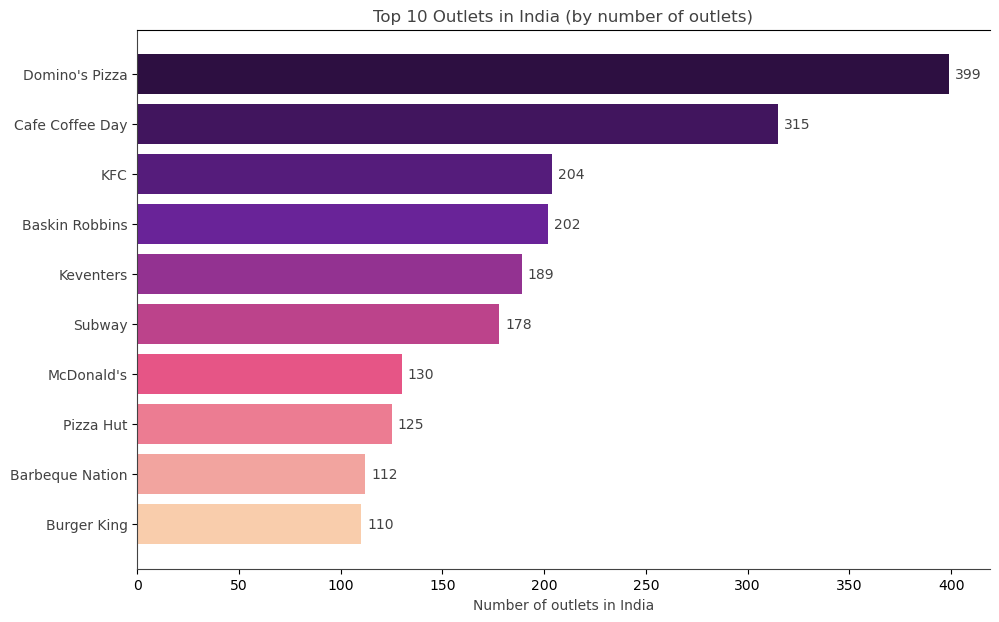

In [44]:
# Data
height = top10_chains.values
bars = top10_chains.index
y_pos = np.arange(len(bars))

# Define the figure and axis
fig, ax = plt.subplots(figsize=(11, 7))

# Define colors 
colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]

# Plot horizontal bar chart
ax.barh(y_pos, height, color=colors)

# Customize axes
ax.set_yticks(y_pos)
ax.set_yticklabels(bars, color="#424242")
ax.set_xlabel("Number of outlets in India", color="#424242")
ax.set_title("Top 10 Outlets in India (by number of outlets)", color = "#424242")

# Remove unnecessary spines
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color="#424242", va="center")

plt.show()

- This chart is majorly dominaed by big fast food chains

**Top restaurant chains (by average rating)**

In [45]:
outlets = df["name"].value_counts()

atleast_5_outlets = outlets[outlets > 4]

In [46]:
top10_chains2 = (
    df[df["name"].isin(atleast_5_outlets.index)]
    .groupby("name")["aggregate_rating"]
    .mean()
    .nlargest(10)[::-1]  # Picks top 10 and reverses for barh()
)

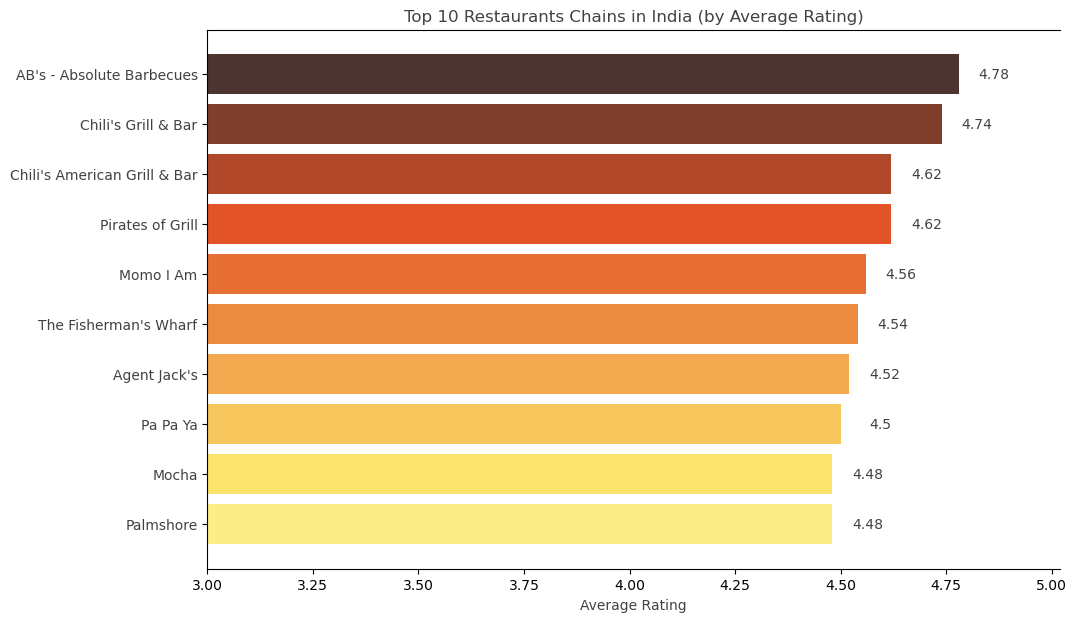

In [47]:
# Round ratings to 2 decimal places
height = np.round(top10_chains2.values, 2)
bars = top10_chains2.index
y_pos = np.arange(len(bars))

# Create figure & axis
fig, ax = plt.subplots(figsize=(11,7))

# Define colors
colors = ['#fded86', '#fce36b', '#f7c65d', '#f1a84f', '#ec8c41', 
          '#e76f34', '#e25328', '#b04829', '#7e3e2b', '#4c3430']

# Plot horizontal bar chart
ax.barh(y_pos, height, color=colors)

# Customize x-axis limits & labels
ax.set_xlim(3)   #Ensures bars dont start too far left
ax.set_xlabel("Average Rating", color="#424242")

# Customize y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(bars, color="#424242")

ax.set_title("Top 10 Restaurants Chains in India (by Average Rating)", color="#424242")

# Remove unnecessary spines
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible("#424242")
ax.spines["bottom"].set_visible("#424242")

# Add value labels inside the bars
for i, v in enumerate(height):
    ax.text(v+0.12, i, str(v), color="#424242", va="center", ha="right")

plt.show()

- Surprisingly, no fast food chain appears in this chart. To maintain a high rating, restaurants needs to provide superior service which becomes impossible with booming fast food restaurant in every street.

#### **Establishment Types**

**Number of Establishments (by establishment type)**

In [48]:
est_count = df.groupby("establishment").count()["res_id"].nlargest(5)
est_count

establishment
Quick Bites        14032
Casual Dining      12270
Café                4123
Bakery              3741
Dessert Parlour     3675
Name: res_id, dtype: int64

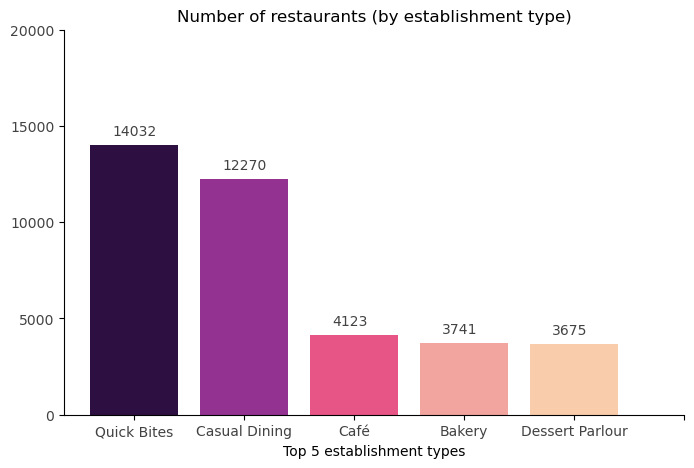

In [49]:
# Create figure & axis
fig, ax = plt.subplots(figsize=(8,5))

# Define colors
colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]

# Plot the bar chart
plt.bar(est_count.index, est_count.values, color=colors)
plt.title("Number of restaurants (by establishment type)")

# Customize x-axis and y-axis labels
plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 establishment types")

# Remove unnecessary spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible("#424242")
ax.spines["bottom"].set_visible("#424242")

# Add values inside the bar
for i, v in enumerate(est_count):
    ax.text(i-0.2, v+500, str(v), color="#424242")

plt.show()

- Top 3 represents more casual and quick service restaurants, then from 4-6 we have dessert based shops.

**Average rating, votes and photos (by Establishment)**

In [50]:
# Average rating by establishment

rating_by_est = df.groupby("establishment")["aggregate_rating"].mean().nlargest(10)
rating_by_est

establishment
Microbrewery     4.268182
Pub              3.758263
Cocktail Bar     3.531250
Fine Dining      3.436547
Lounge           3.436463
Club             3.378571
Irani Cafe       3.321429
Casual Dining    3.238680
Café             3.212345
Butcher Shop     3.110390
Name: aggregate_rating, dtype: float64

In [51]:
# Average votes by establishment

votes_by_est = df.groupby("establishment")['votes'].mean().nlargest(10)
votes_by_est

establishment
Microbrewery     1992.300000
Pub               880.274510
Bar               500.613295
Lounge            494.509756
Casual Dining     396.339935
Cocktail Bar      309.625000
Club              300.544643
Fine Dining       293.126384
Café              276.558574
Irani Cafe        178.714286
Name: votes, dtype: float64

In [52]:
# Average photos by establishment

photos_by_est = df.groupby("establishment")["photo_count"].mean().nlargest(10)
photos_by_est

establishment
Microbrewery     2042.054545
Pub               652.955182
Cocktail Bar      555.625000
Lounge            514.687805
Bar               513.321658
Fine Dining       364.817590
Café              331.935969
Casual Dining     291.550448
Irani Cafe        173.000000
Club              107.089286
Name: photo_count, dtype: float64

- It can be concluded that establishments with availability have the highest average ratings, votes and photo uploads

#### **Cities**

**Number of restaurants (by city)**

In [53]:
city_counts = df.groupby("city")["res_id"].count().sort_values(ascending=True)[-10:]
city_counts

city
Lucknow      1135
Goa          1150
Ahmedabad    1247
Kolkata      1361
Jaipur       1395
New Delhi    1704
Chennai      1827
Pune         1843
Mumbai       2022
Bangalore    2247
Name: res_id, dtype: int64

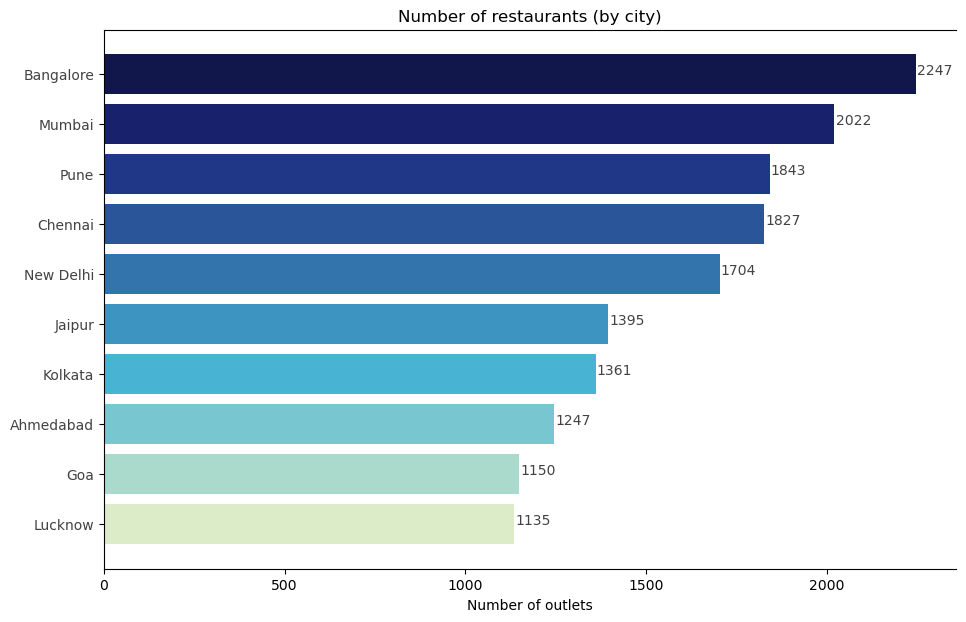

In [54]:
# Getting the city count values
height = city_counts.values
bars = city_counts.index
y_pos = np.arange(len(bars))

# create fig and axis
fig, ax = plt.subplots(figsize=(11,7))

# Define colors
colors =  ['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b']

# Plot the barh chart
plt.barh(y_pos, height, color=colors)

# Customize the axis limits and labels
ax.set_xlim(left=0)
ax.set_xlabel("Number of outlets")
ax.set_yticks(y_pos)
ax.set_yticklabels(bars, color="#424242")

ax.set_title("Number of restaurants (by city)")

# Remove unnecessary spines
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible("#424242")
ax.spines["bottom"].set_visible("#424242")

# Add value labels inside the bars
for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color="#424242")

plt.show()


As expected, metro cities have more number of restaurants than others with South India dominating the Top 4

#### Average rating, votes and photos (by city)

In [55]:
# Average rating by city 
rating_by_city = df.groupby("city")["aggregate_rating"].mean().nlargest(10)
rating_by_city

city
Gurgaon         3.828525
Secunderabad    3.822222
Hyderabad       3.755839
Kolkata         3.751947
New Delhi       3.727347
Mumbai          3.709298
Bangalore       3.698175
Noida           3.620307
Chennai         3.597701
Pune            3.509224
Name: aggregate_rating, dtype: float64

In [56]:
# To check the number of outlets in each of the above cities

city_count = df.groupby("city").count()["name"].sort_values(ascending=False)
rating_by_city_map = city_count.index.isin(rating_by_city.index)
city_count = city_count[rating_by_city_map][rating_by_city.index]
city_count

city
Gurgaon          610
Secunderabad      90
Hyderabad        822
Kolkata         1361
New Delhi       1704
Mumbai          2022
Bangalore       2247
Noida            261
Chennai         1827
Pune            1843
Name: name, dtype: int64

In [57]:
# Average votes by city 
votes_by_city = df.groupby("city")["votes"].mean().nlargest(10)
votes_by_city

city
Hyderabad       955.549878
Secunderabad    955.433333
Mumbai          797.158259
Bangalore       724.940365
New Delhi       711.116197
Kolkata         615.706833
Gurgaon         613.180328
Noida           515.570881
Pune            475.715681
Navi Mumbai     443.342995
Name: votes, dtype: float64

In [58]:
# Average photos by city 
photos_by_city = df.groupby("city")["photo_count"].mean().nlargest(10)
photos_by_city

city
Mumbai         882.273492
New Delhi      764.258216
Gurgaon        678.491803
Kolkata        667.558413
Navi Mumbai    547.323671
Thane          514.963855
Noida          492.291188
Bangalore      462.287939
Hyderabad      377.274939
Pune           333.320130
Name: photo_count, dtype: float64

Gurgaon has highest rated restaurants whereas Hyderabad has more number of critics. Mumbai and New Delhi dominates for most photo uploads per outlet.

### **Cuisine**
#### Unique cuisines

In [59]:
print("Total number of unique cuisines: ",cuisines.nunique())

Total number of unique cuisines:  134


#### Number of restaurants (by cuisine)

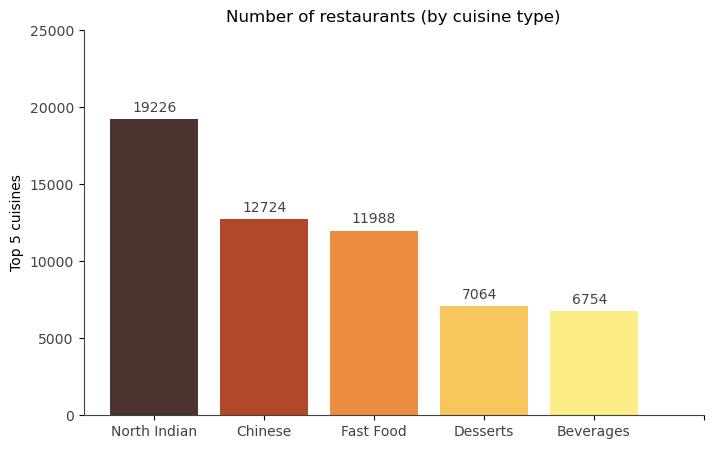

In [60]:
c_count = cuisines.value_counts()[:5]

fig, ax = plt.subplots(figsize=(8,5))

colors = ['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86']
plt.bar(c_count.index, c_count.values, color=colors)
plt.title("Number of restaurants (by cuisine type)")

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 30000, 5000), color="#424242")
plt.ylabel("Top 5 cuisines")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

for i, v in enumerate(c_count):
    ax.text(i-0.2, v+500, str(v), color="#424242")

plt.show()


Surprisingly, Chinese food comes second in the list of cuisines that Indians prefer, even more than fast food, desserts and South Indian food.
#### **Highest rated cuisines**

In [61]:
df["cuisines"]

0         North Indian, South Indian, Mithai, Street Foo...
1         North Indian, Mughlai, Rolls, Chinese, Fast Fo...
2                                         Fast Food, Mithai
3                 Desserts, Bakery, Fast Food, South Indian
4                        North Indian, Continental, Italian
                                ...                        
211882                                            Ice Cream
211925                      Gujarati, North Indian, Chinese
211926                                Gujarati, Street Food
211940                                            Fast Food
211942                           Fast Food, Sandwich, Salad
Name: cuisines, Length: 55568, dtype: object

In [62]:
df["cuisines2"] = df["cuisines"].apply(lambda x: x.split(", "))

# Convert 'cuisines' column into lists
cuisines_list = cuisines.unique().tolist()
zeros =  np.zeros(shape=(len(cuisines_list), 2))
c_and_r = pd.DataFrame(zeros, index=cuisines_list, columns=["Sum", "Total"])

In [63]:
for i, x in df.iterrows():
    for j in x["cuisines2"]:
        c_and_r.loc[j]["Sum"] += x["aggregate_rating"]
        c_and_r.loc[j]["Total"] += 1


In [64]:
c_and_r["Mean"] = c_and_r["Sum"] / c_and_r["Total"]
c_and_r

,Sum,Total,Mean
North Indian,60055.2,19226.0,3.123645
South Indian,18635.3,6381.0,2.920436
Mithai,8545.7,3144.0,2.718098
Street Food,10794.6,3715.0,2.905680
Desserts,22723.9,7064.0,3.216860
...,...,...,...
Swedish,3.6,1.0,3.600000
Cake,6.4,2.0,3.200000
Garhwali,3.3,2.0,1.650000
Vegan,3.5,1.0,3.500000


In [65]:
c_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
Egyptian,4.416667,6.0
Poké,4.350000,12.0
Fusion,4.350000,2.0
International,4.300000,1.0
Tex-Mex,4.293939,33.0
Singaporean,4.287500,16.0
Moroccan,4.258333,12.0
Sushi,4.206087,115.0
Greek,4.159091,22.0
Mediterranean,4.130275,327.0


We can ignore a few cuisines in this list since they are available in less number. But the overall conclusion which can be drawn is that International (and rarely available) cuisines are rated higher than local cuisines.
### Highlights/Features of restaurants
#### Unique highlights

In [66]:
print("Total number of unique cuisines :", h1.nunique())

Total number of unique cuisines : 104


#### Number of restaurants (by highlights)

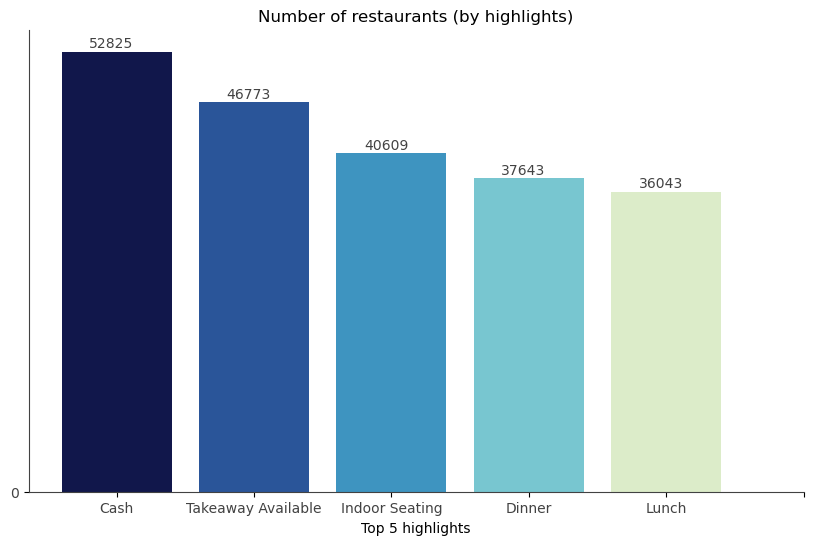

In [67]:
h_count = h1.value_counts()[:5]

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9']
plt.bar(h_count.index, h_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 7000, 10000), color="#424242")
plt.xlabel("Top 5 highlights")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

for i, v in enumerate(h_count):
    ax.text(i-0.2, v+500, str(v), color="#424242")
plt.title("Number of restaurants (by highlights)")

plt.show()

Top 5 highlights doesn't convey much information since they are very trivial to almost every restaurant. Let's look at uncommon highlights that matter more to the customers.
#### Highest rated highlights

In [68]:
df["highlights"][0]

"['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"

In [69]:
df["highlights2"] = df["highlights"].apply(lambda x: x[2:-2].split("', '"))

h1_list = h1.unique().tolist()
zeros = np.zeros(shape=(len(h1_list), 2))
h_and_r = pd.DataFrame(zeros, index=h1_list, columns=["Sum", "Total"])

In [70]:
for i, x in df.iterrows():
    for j in x["highlights2"]:
        h_and_r.loc[j]["Sum"] += x["aggregate_rating"]
        h_and_r.loc[j]["Total"] += 1

In [71]:
h_and_r["Mean"] = h_and_r["Sum"]/h_and_r["Total"]
h_and_r

,Sum,Total,Mean
Lunch,113340.8,36043.0,3.144600
Takeaway Available,139848.5,46773.0,2.989941
Credit Card,94107.2,27530.0,3.418351
Dinner,118364.5,37643.0,3.144396
Cash,157862.8,52825.0,2.988411
...,...,...,...
Celebrity Frequented,90.1,22.0,4.095455
Alipay Accepted,3.0,1.0,3.000000
Subscription Available,4.1,1.0,4.100000
Subscription Required,4.5,1.0,4.500000


In [72]:
h_and_r[["Mean", "Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
Subscription Required,4.500000,1.0
Speakeasy,4.300000,3.0
Gastro Pub,4.198551,69.0
Craft Beer,4.197297,148.0
Romantic Dining,4.162416,149.0
Sneakpeek,4.128316,392.0
Subscription Available,4.100000,1.0
Celebrity Frequented,4.095455,22.0
Keto Options,4.049153,59.0
Pet Friendly,4.017576,165.0


- We can safely ignore highlights which have a frequency of less than 10 since they can be considered as outliers. Features like Gastro pub, Craft beer, Romantic dining and Sneakpeek are well received among customers.

#### Highlights wordcloud
Here we will create a wordcloud of top 30 highlights

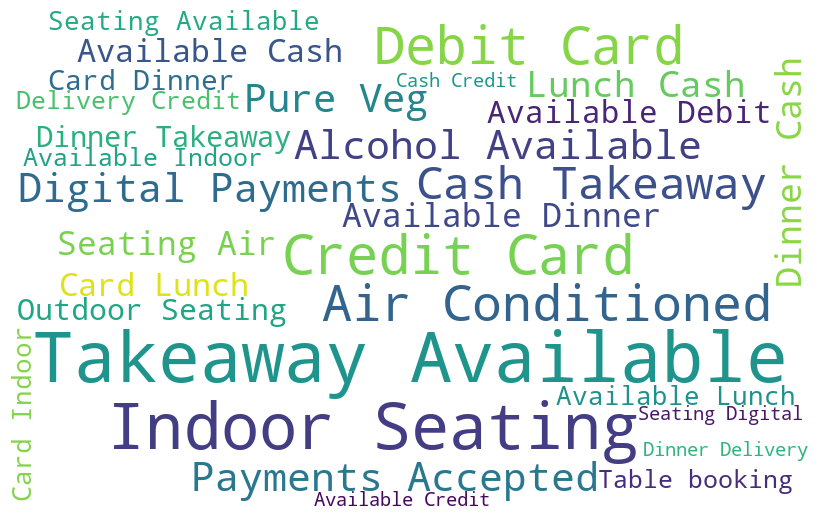

In [73]:
# Efficiently join all words into a single string

h1_str = " ".join(map(str, h1))

# Generate word cloud
wordcloud = WordCloud(
    width = 800, height=500,
    background_color='white',
    min_font_size = 10, max_words = 30
).generate(h1_str)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Ratings and cost
#### Ratings distribution
Let's see how the ratings are distributes

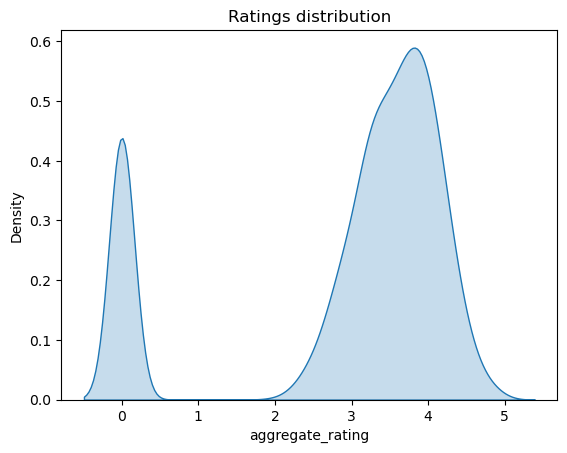

In [74]:
sns.kdeplot(df['aggregate_rating'], fill=True)
plt.title("Ratings distribution")
plt.show()

- There is a huge spike at 0 which might account for newly opened or unrated restaurants. On average, majority of restaurants have rating between 3 to 4 with fewer restaurants managing to go beyond 4.
#### Avergae cost for two distribution

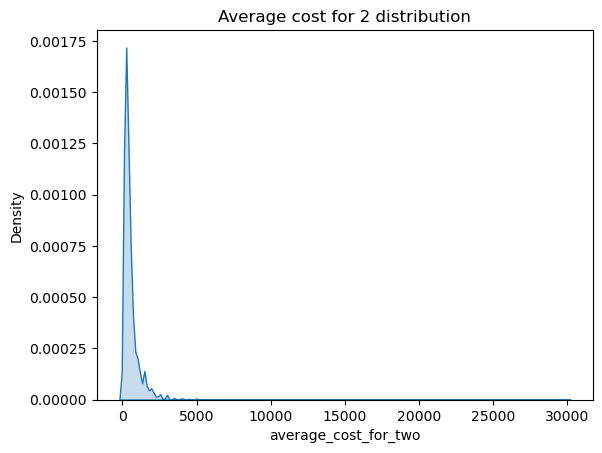

In [75]:
sns.kdeplot(df['average_cost_for_two'], fill=True)
plt.title("Average cost for 2 distribution")
plt.show()

- With few restaurants charging average of Rs.25000+ for two, this graph is extremely skewed. Let's take a closer look at a lower range of 0 to 60000.

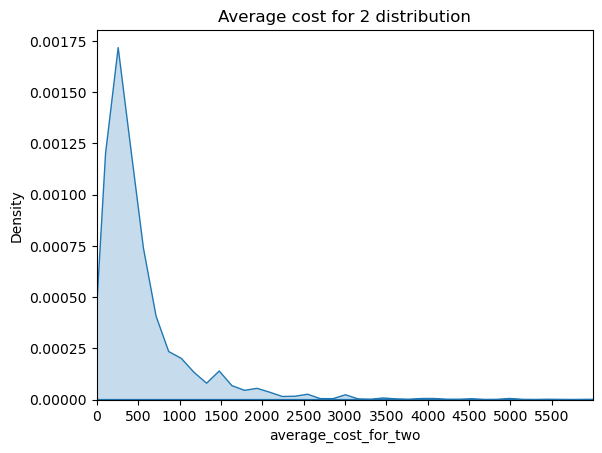

In [76]:
sns.kdeplot(df['average_cost_for_two'], fill=True)
plt.xlim([0, 6000])
plt.xticks(range(0, 6000, 500))
plt.title("Average cost for 2 distribution")
plt.show()

- Majority of restaurants are budget friendly with an average cost between Rs.250 to Rs.800 for two.

#### Price range count

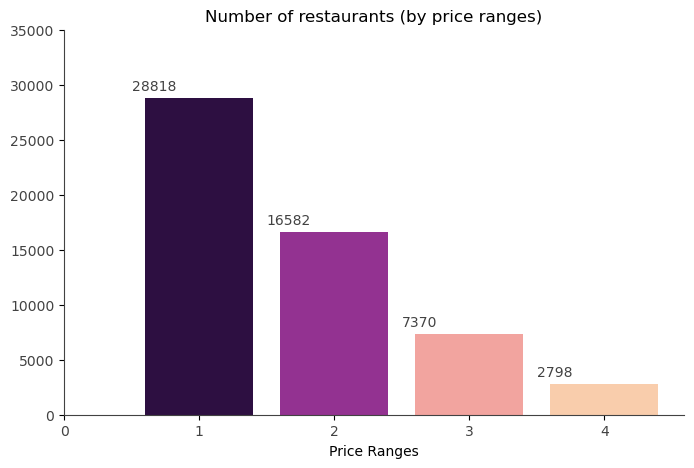

In [77]:
pr_count = df.groupby("price_range").count()["name"]

fig, ax = plt.subplots(figsize=(8,5))

colors = ["#2d0f41",'#933291',"#f2a49f","#f9cdac"]
plt.bar(pr_count.index, pr_count.values, color=colors)
plt.title("Number of restaurants (by price ranges)")

plt.xticks(range(0, 5), color="#424242")
plt.yticks(range(0, 40000, 5000), color="#424242")
plt.xlabel("Price Ranges")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("#424242")
ax.spines['left'].set_color("#424242")

for i, v in enumerate(pr_count):
    plt.text(i+0.5, v+700, str(v), color="#424242" )
    
plt.show()

Price range chart supports our previous observation from the Average cost chart. Number of restaurant decreases with increase in price range.

#### Relation between Average price for two and Rating

In [78]:
np.round(df[["average_cost_for_two", "aggregate_rating"]].corr()["average_cost_for_two"][1],2)

0.25

- A correlation can be seen between restaurant average cost and rating

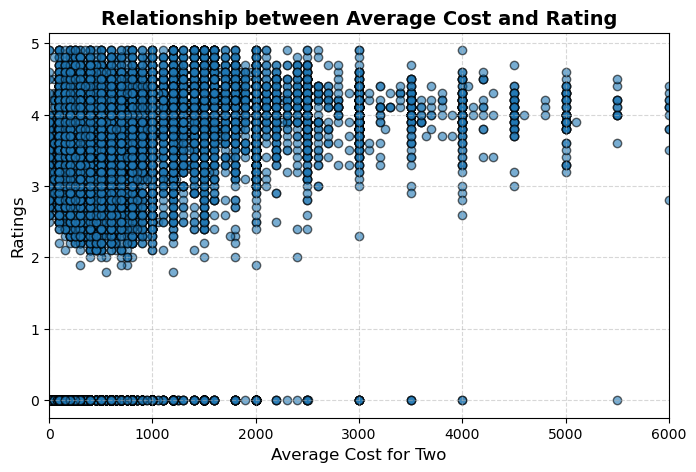

In [79]:
plt.figure(figsize=(8, 5))  # Set figure size for better visualization

# Create scatter plot with improved aesthetics
plt.scatter(df["average_cost_for_two"], df["aggregate_rating"], alpha=0.6, edgecolors="k")

plt.xlim(0, 6000)
plt.title("Relationship between Average Cost and Rating", fontsize=14, fontweight="bold")
plt.xlabel("Average Cost for Two", fontsize=12)
plt.ylabel("Ratings", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.5)  # Add a light grid for better readability
plt.show()


There is definetely a direct relation between the two. Let's take a smaller sample to draw a clearer scatter plot.

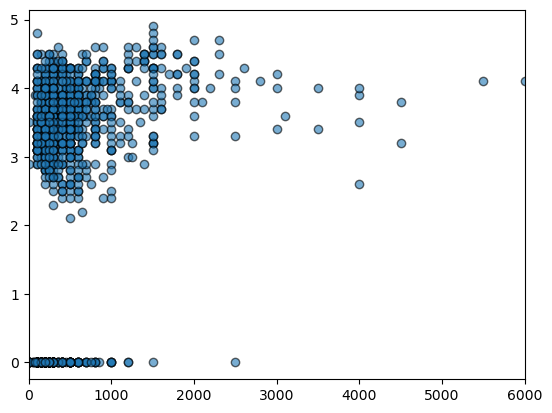

In [88]:
df_sample=df.sample(1000)

plt.scatter(df_sample['average_cost_for_two'], df_sample['aggregate_rating'], alpha=0.6, edgecolors='k')
plt.xlim(0, 6000)
plt.show()

This relation concludes that that as average cost for two increases, there is a better chance that the restaurant will be rated highly. Let's look at price range for a better comparison.

#### Relation between Price range and Rating

In [89]:
np.round(df[['price_range', 'aggregate_rating']].corr()['price_range'][1],2)

0.25

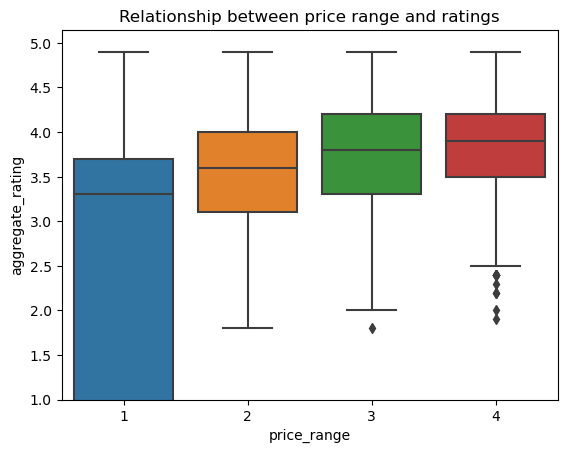

In [90]:
sns.boxplot(x='price_range', y='aggregate_rating', data=df)
plt.ylim(1)
plt.title('Relationship between price range and ratings')
plt.show()

Now, it is clear. The higher the price a restaurant charges, more services they provide and hence more chances of getting good ratings from their customers.

## Conclusions

After working on this data, we can conclude the following things:-
1. Approx. 35% of restaurants in India are part of some chain
2. Domino's Pizza, Cafe Coffee Day, KFC are the biggest fast food chains in the country with most number of outlets
3. Barbecues and Grill food chains have highest average ratings than other type of restaurants 
4. Quick bites and casual dining type of establishment have most number of outlets
5. Establishments with alcohol availability have highest average ratings, votes and photo uploads
6. Banglore has most number of restaurants 
7. Gurgaon has highest rated restaurants (average 3.83) whereas Hyderabad has more number of critics (votes). Mumbai and New Delhi dominates for most photo uploads per outlet
8. After North Indian, Chinese is the most prefered cuisine in India
9. International cuisines are better rated than local cuisines
10. Gastro pub, Romantic Dining and Craft Beer features are well rated by customers
11. Most restaurants are rated between 3 and 4
12. Majority of restaurants are budget friendly with average cost of two between Rs.250 to Rs.800
13. There are less number of restaurants at higher price ranges
14. As the average cost of two increases, the chance of a restaurant having higher rating increases

Now we have come to the end of this project, I hope you learned some new tricks. 

<b>Please give this notebook an upvote if you find it useful!</b>

In [93]:
df.to_csv("F:\Internships\Labmentix\Zomato EDA Project\Zomato_Cleaned.csv", index=False)